# Business Objectives :

### >> This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

### Problem Description :
#### > In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

#### > If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

#### > In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



### Solution : 

### Importing Necessary Libraries

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O.

# For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# For Warnings
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset -

In [75]:
loan = pd.read_csv('F://loan.csv')

In [76]:
# Reading Datset
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Metadata of the Dataframe:

In [77]:
print("Shape of dataframe is "+str(loan.shape)+"\n")
print("Information about dataframe: ")
loan.info()

Shape of dataframe is (39717, 111)

Information about dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [78]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Understanding Variables - 

In [79]:
# Loading Dictionary for better Knowledge about varianbles
Data_Dictionary = pd.read_excel('F://Data_Dictionary.xlsx')
Data_Dictionary.dropna( axis=1, how='all',inplace= True)
Data_Dictionary.style.set_properties(subset=['Description'], **{'width' :'850px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Data Cleansing :

<AxesSubplot:>

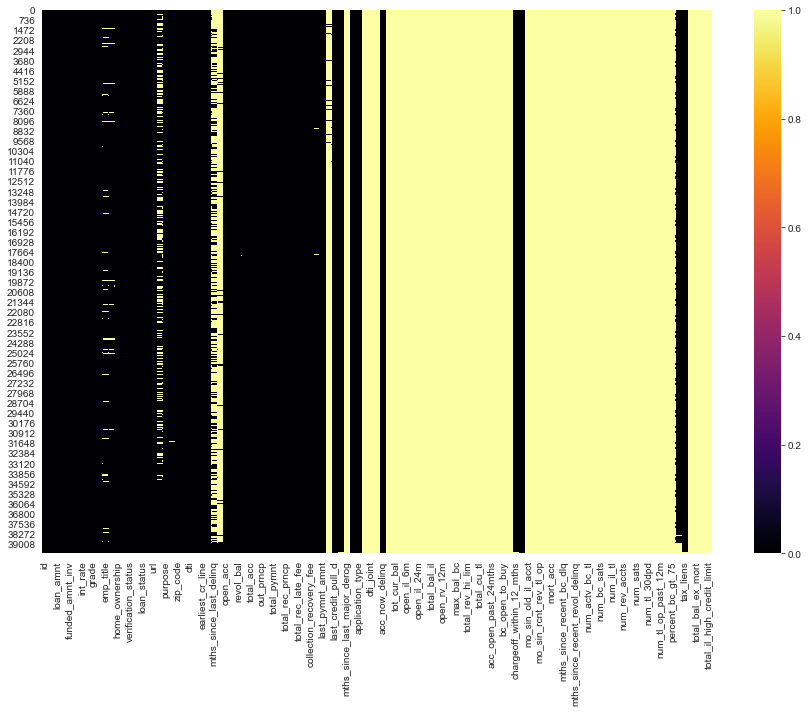

In [80]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(loan.isna(),cmap='inferno')

#### As we have found many null values and records - 

In [81]:
# Removing the columns having null for more than 50% of the records
percent_missing = loan.isnull().sum() * 100 / len(loan)
missing_value_loan = pd.DataFrame({'column_name': loan.columns,
                                 'percent_missing': percent_missing})
columns_with_null = list(missing_value_loan[percent_missing >=50].column_name)

loan  = loan.drop(columns_with_null,axis=1)
loan.shape

(39717, 54)

#### Columns having unique values, distinct values, low cardinality are not useful in this case so dropping them will be a better step for accuracy -

In [85]:
# Creating dataframe, containing column name and unique values for each column

loan_with_distinct_values = pd.DataFrame({'columnName':loan.columns,'uniqueValues':loan.nunique()}).sort_values('uniqueValues',ascending=True)
loan_with_distinct_values

,columnName,uniqueValues
tax_liens,tax_liens,1
delinq_amnt,delinq_amnt,1
chargeoff_within_12_mths,chargeoff_within_12_mths,1
acc_now_delinq,acc_now_delinq,1
application_type,application_type,1
policy_code,policy_code,1
initial_list_status,initial_list_status,1
collections_12_mths_ex_med,collections_12_mths_ex_med,1
pymnt_plan,pymnt_plan,1
term,term,2


In [86]:
# Getting the columns list which we have null for all rows or have cardinality of 1

columns_having_one_no_values = list(loan_with_distinct_values[loan_with_distinct_values.uniqueValues == 1].columnName)
columns_having_one_no_values

['tax_liens',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'application_type',
 'policy_code',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'pymnt_plan']

In [87]:
# Getting the columns list which we have unique values for each row, also dont contribute to analysis

columns_having_all_distinct_values = list(loan_with_distinct_values[loan_with_distinct_values.uniqueValues == len(loan)].columnName)
columns_having_all_distinct_values

['url', 'member_id', 'id']

In [88]:
# Dropping the columns from dataframe which have very low cardinality as they have more noise and wont be helpful for analysis

loan_without_lowcardinality_columns = loan.drop(columns_having_one_no_values,axis=1)
loan_without_lowcardinality_columns.shape

(39717, 45)

In [89]:
# Dropping the columns from dataframe which have very unique vaues for each row as they contribute to analysis

loan_without_extremecardinality_columns = loan_without_lowcardinality_columns.drop(columns_having_all_distinct_values,axis=1)
loan_without_extremecardinality_columns.shape

(39717, 42)

###### As per  further the analysis below columns can also be removed  as the high co-linearity or dont serve the business requirements - 

In [113]:
# Dropping DESC column as similar information is present in  PURPOSE and TITLE
# Dropping EMP_TITLE as many of the records have unique values and doesnt contribute to analysis
# Dropping ZIP_CODE as last 2-digits are masked and do not contribute to analysis
# Dropping TITLE as equivalent to PURPOSE. removing to avoid multi colinearity.
# Dropping INSTALLMENT, FUNDED_AMNT & FUNDED_AMNT_INV as equivalent to LOAN_AMNT. removing to avoid multi colinearity.
# Dropping PUB_REC as have high colinearity with PUB_REC_BANKRUPTCIES
# Dropping OPEN_ACC as it have high colineraity with TOTAL_ACC




loan = loan_without_extremecardinality_columns.drop(['desc','emp_title','zip_code','title','funded_amnt_inv','open_acc',
                                                     'pub_rec_bankruptcies','installment','funded_amnt'],axis=1)


# Drop below as they dont contribute to analyze whether the loan will be defaulted or not 
# as they are not available after approval of loan

# out_prncp 
# out_prncp_inv
# total_pymnt
# total_pymnt_inv
# total_rec_int
# total_rec_late_fee
# total_rec_prncp
# last_pymnt_amnt 
# last_pymnt_d 
# next_pymnt_d
# earliest_cr_line
# last_credit_pull_d
# recoveries
# collection_recovery_fee
# revol_util
# issue_d

loan = loan.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','last_credit_pull_d','earliest_cr_line'
                             ,'total_rec_int','total_rec_late_fee','total_rec_prncp','last_pymnt_amnt','revol_util'
                             ,'last_pymnt_d','collection_recovery_fee','recoveries'],axis=1)

loan

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,0,13648,9
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,0,1687,4
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,0,2956,10
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,0,5598,37
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,0,0,27783,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,0,0,7274,40
39713,8500,36 months,10.28%,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,1,1,0,8847,9
39714,5000,36 months,8.07%,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,0,0,9698,20
39715,5000,36 months,7.43%,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,0,0,85607,26


#### Checking Statuses of loans - 

In [114]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [116]:
# Removing the records for which LOAN_STATUS  is 'Current', as we are still not sure if these laons will be defaulted or not
loan = loan[loan.loan_status != 'Current']

#### We have found some columns require standardization and even deriving colmns necessary -

In [117]:
# Standardizing the columns removing months from term and % from percent and removing years from empLength
loan.term  = loan.term.str.strip(' months').astype('int')
loan.int_rate = loan.int_rate.str.strip('%').astype('float')

empLength = { '< 1 year' : 0,'1 year' : 1, '2 years' : 2, '3 years' : 3, '4 years' : 4, '5 years' : 5,
    '6 years' : 6, '7 years' : 7, '8 years' : 8, '9 years' : 9, '10+ years' : 10}

loan = loan.replace({'emp_length':empLength})

In [118]:
# Deriving the issued_year from issue_d column
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issued_year'] = pd.DatetimeIndex(loan['issue_d']).year

In [119]:
loan

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,issued_year
0,5000,36,10.65,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,0,13648,9,2011
1,2500,60,15.27,C,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,0,1687,4,2011
2,2400,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,0,2956,10,2011
3,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,0,5598,37,2011
5,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,0,7963,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36,8.07,A,A4,4.0,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,0,0,0,7274,40,2007
39713,8500,36,10.28,C,C1,3.0,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,1,1,0,8847,9,2007
39714,5000,36,8.07,A,A4,0.0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,0,0,0,9698,20,2007
39715,5000,36,7.43,A,A2,0.0,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,0,0,0,85607,26,2007


In [122]:
loan.dtypes

loan_amnt                       int64
term                            int32
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
pub_rec                         int64
revol_bal                       int64
total_acc                       int64
issued_year                     int64
dtype: object

In [159]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'total_acc', 'issued_year',
       'Loan_Amount', 'Annual_Income', 'Interest_Rate', 'Employment_Length',
       'Revolving_Balance'],
      dtype='object')

## EDA:

### 1. Univariate Analysis -

#### Columns like Loan amount and Loan status are very important for getting customers behaviour -

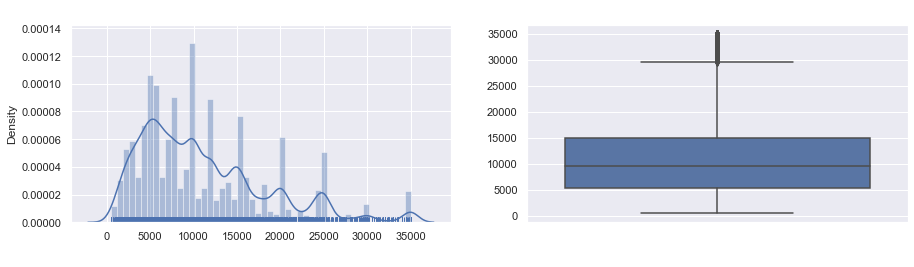

In [125]:
# loan_amount

plt.figure(figsize=(15,8))

# Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

#Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

#### As we can see there are many outliers in the column - Loan amount it needs to be treated

In [126]:
# Calculating the outliers for loan_amount

loan.loan_amnt.describe()


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [127]:
# Outlier Treatment
# outlier_limimt = Q3  + (Q3-Q1)*1.5

outlier_limit = 15000.000000+((15000.000000-5300.000000)*1.5)
loan = loan[loan.loan_amnt <= 29550]
loan.shape

(37489, 20)

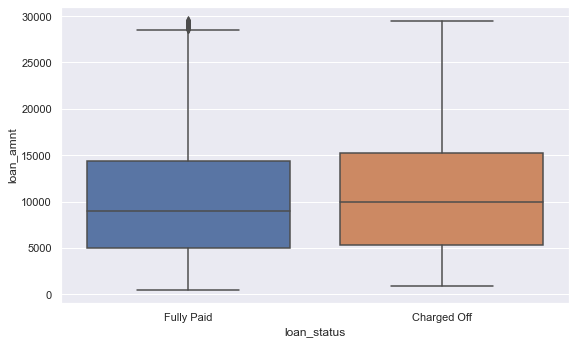

count    37489.000000
mean     10408.101043
std       6398.162546
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14975.000000
max      29550.000000
Name: loan_amnt, dtype: float64

In [128]:
# Box plot of loan after removal of outliers
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()
loan['loan_amnt'].describe()

#### Analyzing Categorical columns for better understanding of cutomers requirment and status -

In [137]:
# Dataframe of categorical columns
loan.loc[:,['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state']].head()

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state
0,B,B2,RENT,Verified,Fully Paid,credit_card,AZ
1,C,C4,RENT,Source Verified,Charged Off,car,GA
2,C,C5,RENT,Not Verified,Fully Paid,small_business,IL
3,C,C1,RENT,Source Verified,Fully Paid,other,CA
5,A,A4,RENT,Source Verified,Fully Paid,wedding,AZ


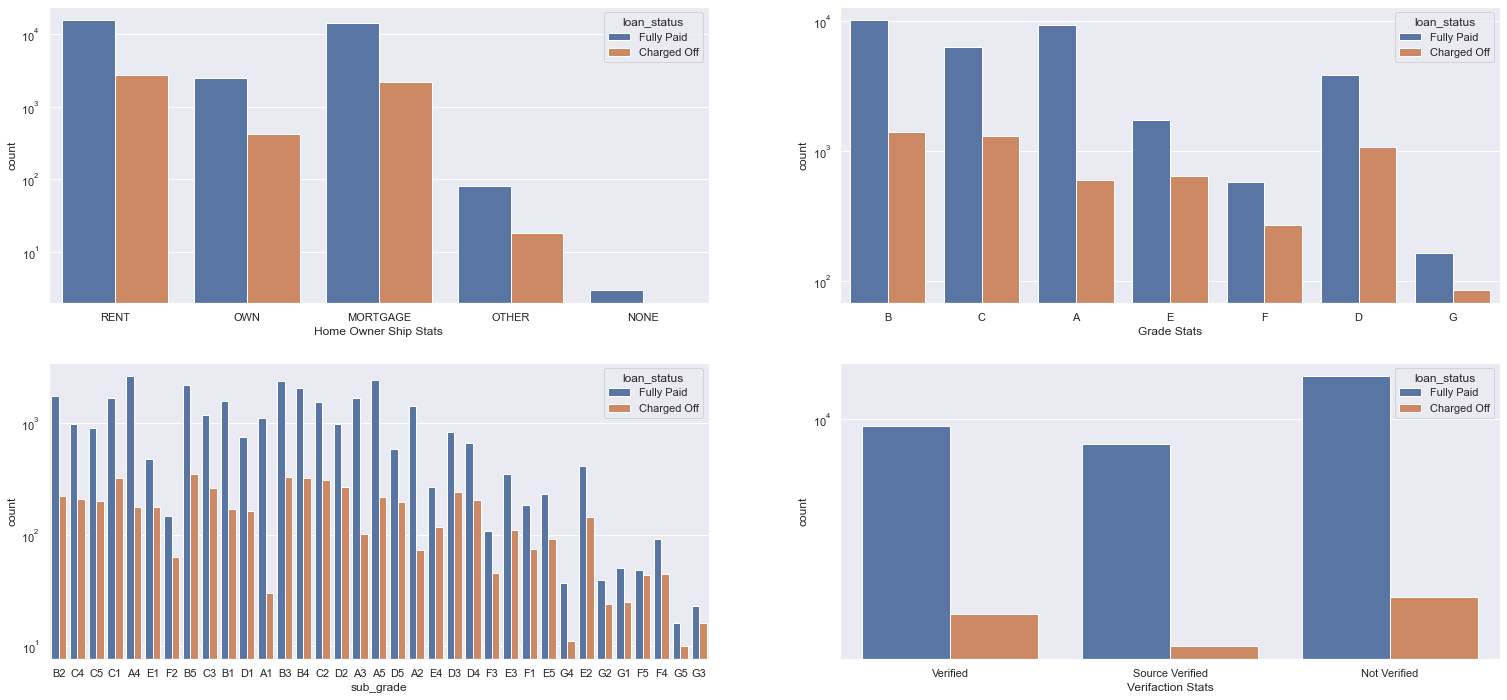

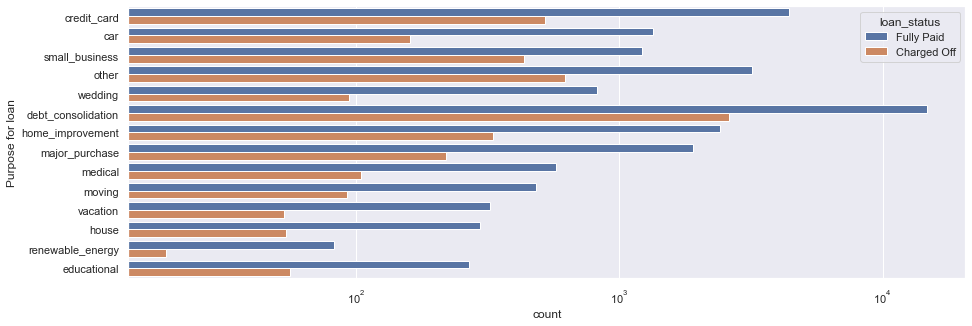

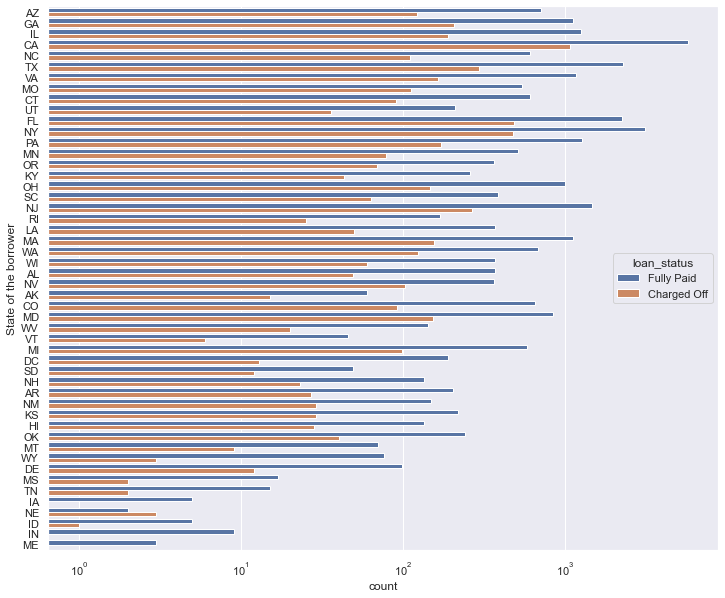

In [139]:
# Countplots
# NOTE: Using log scale so as increase the scale, and have better readabiity of plots

plt.figure(figsize=(26,12))

# Home_ownership vs Loan status
plt.subplot(2,2, 1)
ax = sns.countplot(x='home_ownership', hue='loan_status', data=loan)
ax.set_yscale("log")
plt.xlabel('Home Owner Ship Stats')

# Grade vs Loan status
plt.subplot(2, 2, 2)
ax =sns.countplot(x='grade', hue='loan_status', data=loan)
ax.set_yscale("log")
plt.xlabel('Grade Stats')

#Sub-Grade vs Loan Status
plt.subplot(2, 2, 3)
ax = sns.countplot(x='sub_grade', hue='loan_status', data=loan)
ax.set_yscale("log")

#Verification Stats vs Laon status
plt.subplot(2, 2, 4)
ax = sns.countplot(x='verification_status', hue='loan_status', data=loan)
ax.set_yscale("log")
plt.xlabel('Verifaction Stats')
plt.show()


# Purpose vs Loan status
ax = sns.countplot(y="purpose",data=loan,hue='loan_status')
ax.set_xscale("log")
plt.ylabel('Purpose for loan')      
plt.show()

#address vs Loan status
plt.figure(figsize=(12,10))
ax = sns.countplot(y="addr_state",data=loan,hue='loan_status')
ax.set_xscale("log")
plt.ylabel('State of the borrower')     
plt.show()

### 2. Bivariate Analysis -

#### Before analysing Colinearity check is important as high colinearity in variables makes them less significant

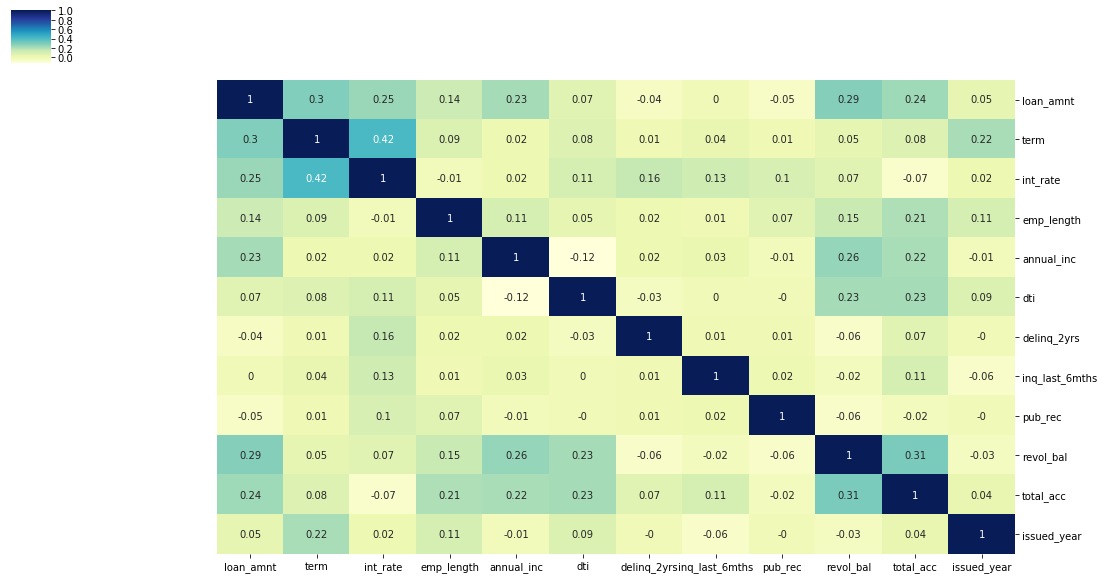

In [29]:
# Plotting hash map so as to check if there are any high colinearity among and to get some general relationship between columns

loan_correlation = loan.corr().round(2)
sns.clustermap(loan_correlation,annot=True,figsize=(18,10),col_cluster=False,row_cluster=False,cmap="YlGnBu")
plt.show()

#### a. LOAN_AMOUNT VS LOAN_STATUS 

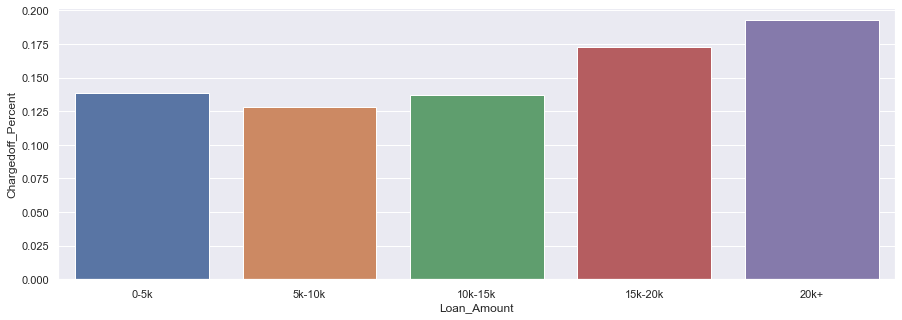

In [140]:


bins = [0, 5000, 10000, 15000, 20000,50000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k+']
loan['Loan_Amount'] = pd.cut(loan['loan_amnt'], bins,labels=labels)
groupedByIncome = loan.groupby(['Loan_Amount', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByIncome['Total'] = groupedByIncome['Charged Off'] + groupedByIncome['Fully Paid'] 
groupedByIncome['Chargedoff_Percent'] = groupedByIncome['Charged Off'] / groupedByIncome['Total']


sns.barplot(x='Loan_Amount', y='Chargedoff_Percent', data=groupedByIncome)
plt.show()




#### Observations : With increase in Loan Amount Chargedoff_Percent is increasing. 

#### b. ANNUAL_INCOME VS LOAN_STATUS


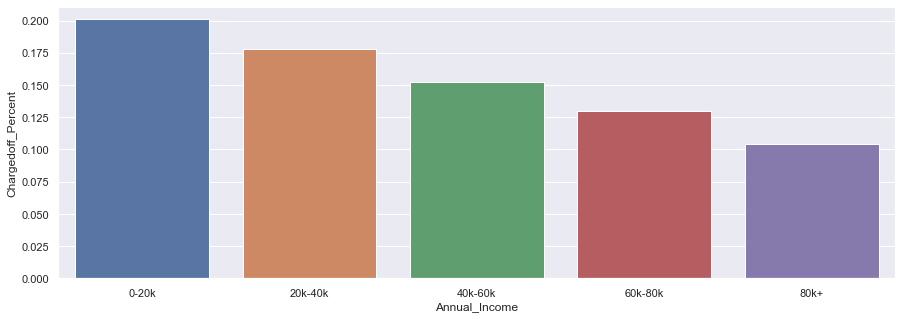

In [141]:
 

bins = [0, 20000, 40000, 60000, 80000,1000000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k+']
loan['Annual_Income'] = pd.cut(loan['annual_inc'], bins,labels=labels)
groupedByIncome = loan.groupby(['Annual_Income', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByIncome['Total'] = groupedByIncome['Charged Off'] + groupedByIncome['Fully Paid'] 
groupedByIncome['Chargedoff_Percent'] = groupedByIncome['Charged Off'] / groupedByIncome['Total']


sns.barplot(x='Annual_Income', y='Chargedoff_Percent', data=groupedByIncome)
plt.show()

 

#### Observations : With increase in Annual income Chargedoff_Percent is decreasing.

#### c. INTEREST_RATE VS LOAN_STATUS 

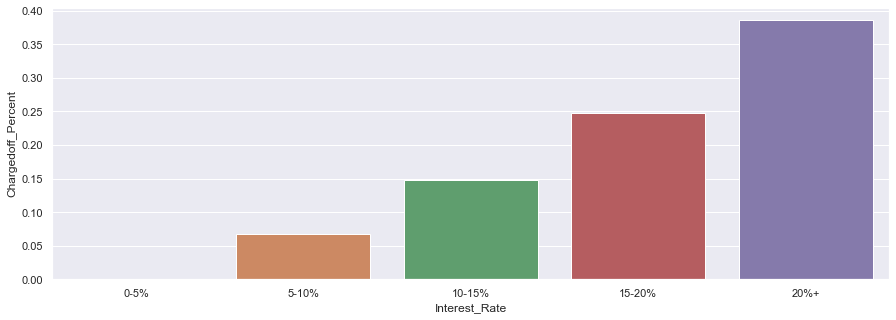

In [142]:


bins = [0, 5, 10, 15, 20,35]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20%+']
loan['Interest_Rate'] = pd.cut(loan['int_rate'], bins,labels=labels)
groupedByInterest = loan.groupby(['Interest_Rate', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByInterest['Total'] = groupedByInterest['Charged Off'] + groupedByInterest['Fully Paid'] 
groupedByInterest['Chargedoff_Percent'] = groupedByInterest['Charged Off'] / groupedByInterest['Total']
# groupedByInterest = groupedByInterest.round(2).sort_values('Chargedoff_Percent', ascending=False)
# groupedByInterest.loc[:,['Interest_Rate','Chargedoff_Percent']].style.hide_index()


sns.barplot(x='Interest_Rate', y='Chargedoff_Percent', data=groupedByInterest)
plt.show()



#### Observations: With increase in Interest Rate Chargedoff_Percent is increasing

#### d. DTI VS LOAN_STATUS

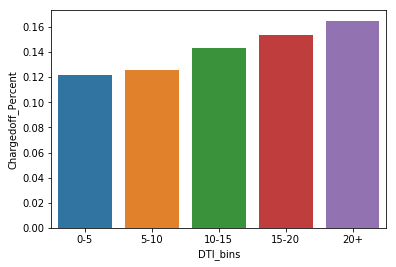

In [34]:
 

bins = [0, 5, 10, 15, 20,35]
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
loan['DTI_bins'] = pd.cut(loan['dti'], bins,labels=labels)
groupedByDTI = loan.groupby(['DTI_bins', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByDTI['Total'] = groupedByDTI['Charged Off'] + groupedByDTI['Fully Paid'] 
groupedByDTI['Chargedoff_Percent'] = groupedByDTI['Charged Off'] / groupedByDTI['Total']


sns.barplot(x='DTI_bins', y='Chargedoff_Percent', data=groupedByDTI)
plt.show()




#### Observations: With increase in DTI, Chargedoff_Percent is increasing

#### e. TERM VS LOAN_STATUS

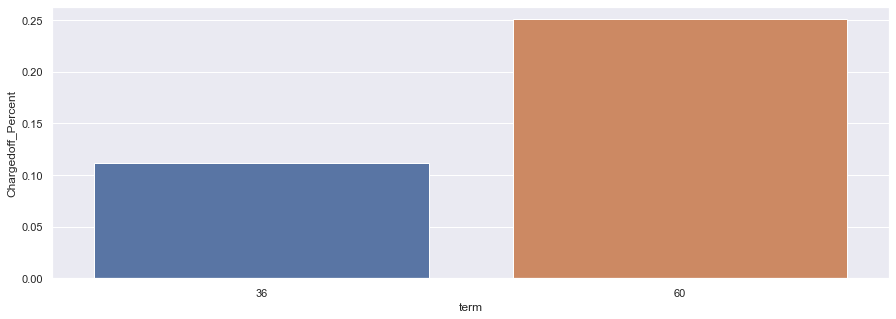

In [144]:
 

groupedByTerm = loan.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByTerm['Total'] = groupedByTerm['Charged Off'] + groupedByTerm['Fully Paid'] 
groupedByTerm['Chargedoff_Percent'] = groupedByTerm['Charged Off'] / groupedByTerm['Total']


sns.barplot(x='term', y='Chargedoff_Percent', data=groupedByTerm)
plt.show()




#### Observations : With increase in Term, Chargedoff_Percent is increasing

#### f. GRADE VS LOAN_STATUS

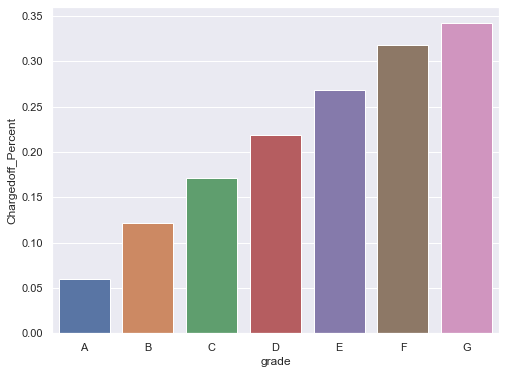

In [143]:
 

groupedByGrade = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByGrade['Total'] = groupedByGrade['Charged Off'] + groupedByGrade['Fully Paid'] 
groupedByGrade['Chargedoff_Percent'] = groupedByGrade['Charged Off'] / groupedByGrade['Total']

plt.figure(figsize=(8, 6))

# plt.bar(groupedByGrade.grade,groupedByGrade.Chargedoff_Percent)
sns.barplot(x='grade', y='Chargedoff_Percent',data=groupedByGrade)
plt.show()


 

#### Observations : For Lower Grade Chargedoff_Percent is increasing.

#### g. SUB_GRADE VS LOAN_STATUS 

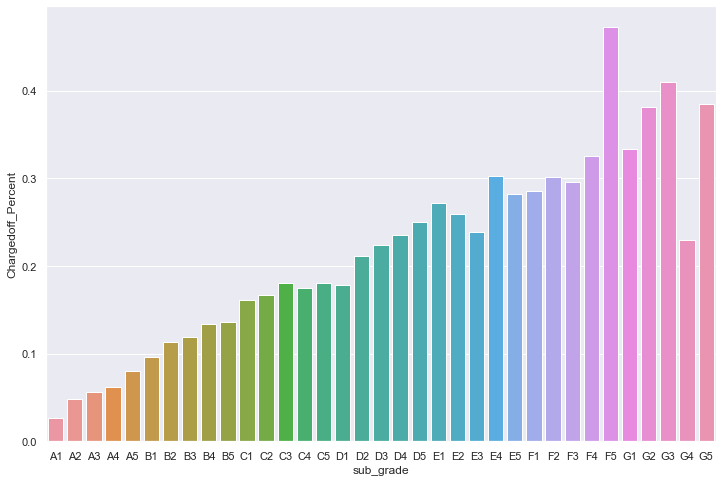

In [145]:


groupedByGrade = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByGrade['Total'] = groupedByGrade['Charged Off'] + groupedByGrade['Fully Paid'] 
groupedByGrade['Chargedoff_Percent'] = groupedByGrade['Charged Off'] / groupedByGrade['Total']

plt.figure(figsize=(12, 8))
sns.barplot(x='sub_grade', y='Chargedoff_Percent', data=groupedByGrade)
plt.show()




#### Observations : For Lower Sub-Grade Chargedoff_Percent is increasing. 

#### h. HOME_OWNERSHIP VS LOAN_STATUS

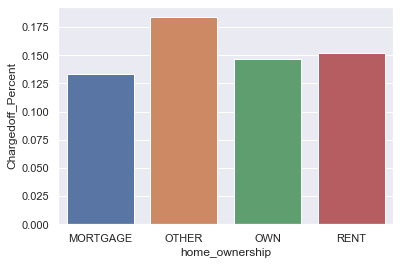

In [146]:
 

groupedByHomeOwnerShip = loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByHomeOwnerShip['Total'] = groupedByHomeOwnerShip['Charged Off'] + groupedByHomeOwnerShip['Fully Paid'] 
groupedByHomeOwnerShip['Chargedoff_Percent'] = groupedByHomeOwnerShip['Charged Off'] / groupedByHomeOwnerShip['Total']
groupedByHomeOwnerShip = groupedByHomeOwnerShip[groupedByHomeOwnerShip.Chargedoff_Percent != 0] 

plt.figure(figsize=(6, 4))
sns.barplot(x='home_ownership', y='Chargedoff_Percent', data=groupedByHomeOwnerShip)
plt.show()




#### Observations : For those whose ownership is unknown have highest Chargedoff_Percent

#### i. VERIFICATION_STATUS VS LOAN_STATUS

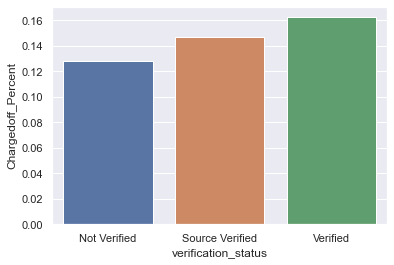

In [147]:
 

groupedByVerificationStatus = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByVerificationStatus['Total'] = groupedByVerificationStatus['Charged Off'] + groupedByVerificationStatus['Fully Paid'] 
groupedByVerificationStatus['Chargedoff_Percent'] = groupedByVerificationStatus['Charged Off'] / groupedByVerificationStatus['Total']
groupedByVerificationStatus = groupedByVerificationStatus[groupedByVerificationStatus.Chargedoff_Percent != 0] 

plt.figure(figsize=(6, 4))
sns.barplot(x='verification_status', y='Chargedoff_Percent', data=groupedByVerificationStatus)
plt.show()




#### Observations : For those whose income was verified shows highest Chargedoff_Percent

#### j. PURPOSE VS LOAN_STATUS 

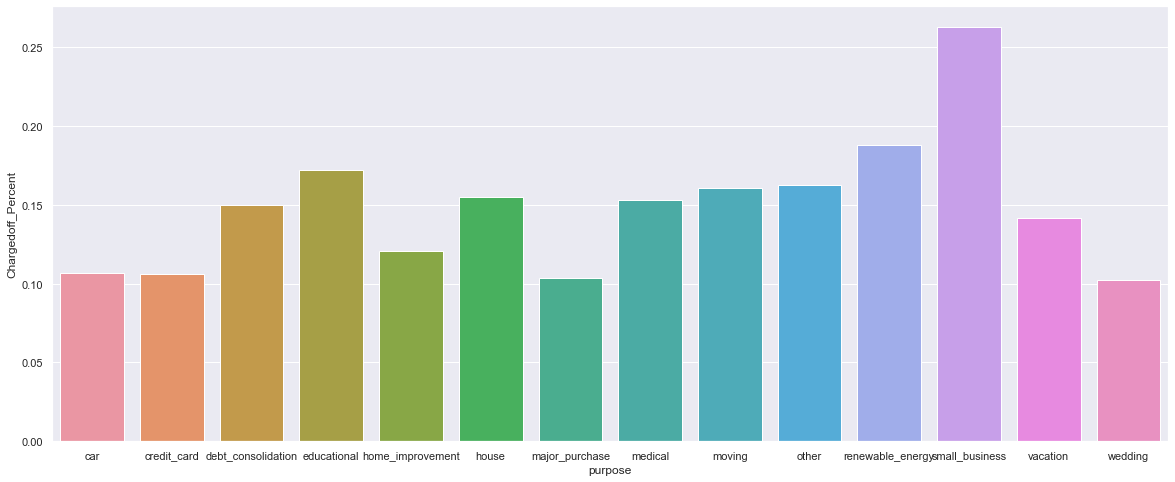

In [148]:


groupedByPurpose = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByPurpose['Total'] = groupedByPurpose['Charged Off'] + groupedByPurpose['Fully Paid'] 
groupedByPurpose['Chargedoff_Percent'] = groupedByPurpose['Charged Off'] / groupedByPurpose['Total']
groupedByPurpose = groupedByPurpose[groupedByPurpose.Chargedoff_Percent != 0] 

plt.figure(figsize=(20,8))
sns.barplot(x='purpose', y='Chargedoff_Percent', data=groupedByPurpose)
plt.show()




#### Observations : Small business and Renewable energy purposes shows highest Chargedoff_Percent

#### k. EMP_LENGTH VS LOAN_STATUS 

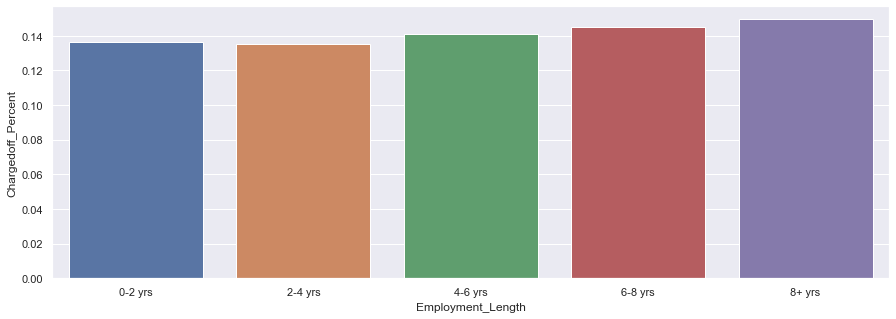

In [149]:


bins = [0, 2,4,6,8,12]
labels = ['0-2 yrs', '2-4 yrs', '4-6 yrs', '6-8 yrs', '8+ yrs']
loan['Employment_Length'] = pd.cut(loan['emp_length'], bins,labels=labels)
groupedByEmpLength = loan.groupby(['Employment_Length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByEmpLength['Total'] = groupedByEmpLength['Charged Off'] + groupedByEmpLength['Fully Paid'] 
groupedByEmpLength['Chargedoff_Percent'] = groupedByEmpLength['Charged Off'] / groupedByEmpLength['Total']
groupedByEmpLength = groupedByEmpLength[groupedByEmpLength.Chargedoff_Percent != 0] 


sns.barplot(x='Employment_Length', y='Chargedoff_Percent', data=groupedByEmpLength)
plt.show()




#### Observations : With the increase in employment_length the ChargedOff_Precent in increasing

#### l. ADDR_STATE VS LOAN_STATUS 

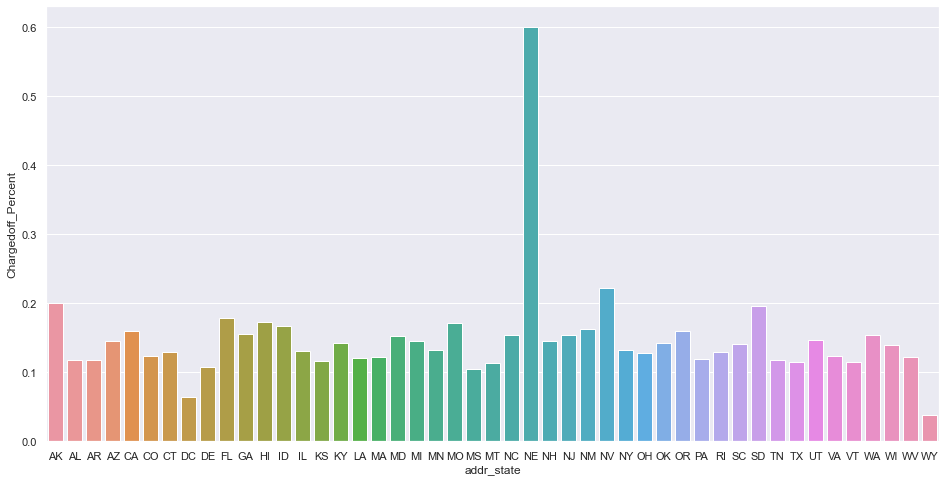

In [150]:


groupedByState = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByState['Total'] = groupedByState['Charged Off'] + groupedByState['Fully Paid'] 
groupedByState['Chargedoff_Percent'] = groupedByState['Charged Off'] / groupedByState['Total']
groupedByState = groupedByState[groupedByState.Chargedoff_Percent != 0] 

plt.figure(figsize=(16,8))
sns.barplot(x='addr_state', y='Chargedoff_Percent', data=groupedByState)
plt.show()




#### Observations : Stateof NE shows highest Chargedoff_Percent

#### m. REVOL_BAL VS LOAN_STATUS

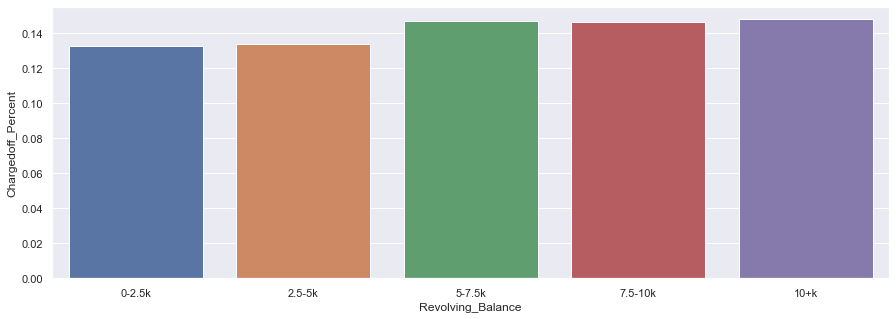

In [151]:
 

bins = [0,2500,5000,7500,10000,1500000]
labels = ['0-2.5k', '2.5-5k', '5-7.5k', '7.5-10k', '10+k']
loan['Revolving_Balance'] = pd.cut(loan['revol_bal'], bins,labels=labels)
groupedByRevolBal = loan.groupby(['Revolving_Balance', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByRevolBal['Total'] = groupedByRevolBal['Charged Off'] + groupedByRevolBal['Fully Paid'] 
groupedByRevolBal['Chargedoff_Percent'] = groupedByRevolBal['Charged Off'] / groupedByRevolBal['Total']
groupedByRevolBal = groupedByRevolBal[groupedByRevolBal.Chargedoff_Percent != 0] 


ax = sns.barplot(x='Revolving_Balance', y='Chargedoff_Percent', data=groupedByRevolBal)
plt.show()


#### Observations : Higher the Resolving_Balance the chances for ChargedOff_Precent in increasing

#### n. TOTAL_ACC VS LOAN_STATUS 

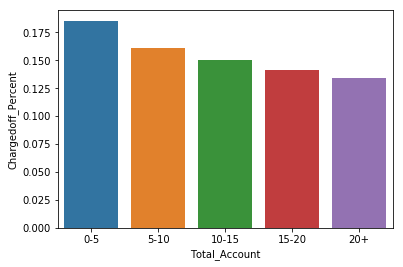

In [47]:


bins = [0,5,10,15,20,100]
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
loan['Total_Account'] = pd.cut(loan['total_acc'], bins,labels=labels)
groupedByTotalAcc = loan.groupby(['Total_Account', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByTotalAcc['Total'] = groupedByTotalAcc['Charged Off'] + groupedByTotalAcc['Fully Paid'] 
groupedByTotalAcc['Chargedoff_Percent'] = groupedByTotalAcc['Charged Off'] / groupedByTotalAcc['Total']
groupedByTotalAcc = groupedByTotalAcc[groupedByTotalAcc.Chargedoff_Percent != 0] 


ax = sns.barplot(x='Total_Account', y='Chargedoff_Percent', data=groupedByTotalAcc)
plt.show()



#### Observations : People with high number of open credit lines(Total_Acc) the ChargedOff_Precent in decreasing

#### o. DELINQ_2YRS VS LOAN_STATUS 

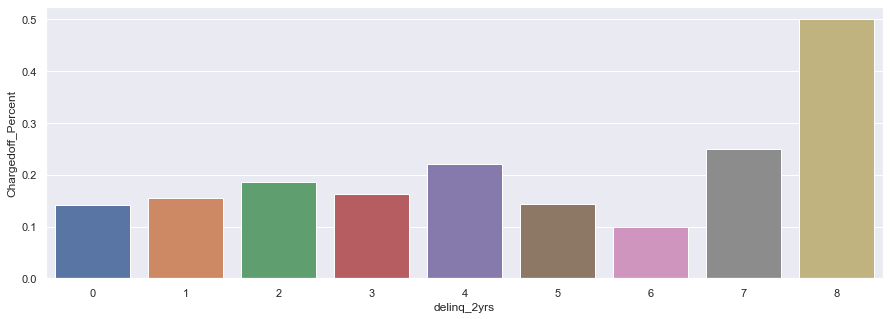

In [154]:


groupedByDelinq2yrs = loan.groupby(['delinq_2yrs', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByDelinq2yrs['Total'] = groupedByDelinq2yrs['Charged Off'] + groupedByDelinq2yrs['Fully Paid'] 
groupedByDelinq2yrs['Chargedoff_Percent'] = groupedByDelinq2yrs['Charged Off'] / groupedByDelinq2yrs['Total']
groupedByDelinq2yrs = groupedByDelinq2yrs[groupedByDelinq2yrs.Chargedoff_Percent != 0] 

sns.barplot(x='delinq_2yrs', y='Chargedoff_Percent', data=groupedByDelinq2yrs)
plt.show()



#### Observations :  With the increase in delinq_2yrs the ChargedOff_Precent in increaasing

#### p. INQ_LAST_6mnths VS LOAN_STATUS

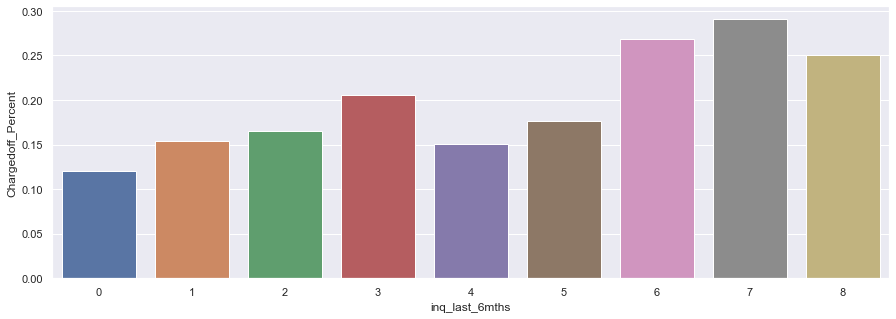

In [155]:
 

groupedByEnquiry6mths = loan.groupby(['inq_last_6mths', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByEnquiry6mths['Total'] = groupedByEnquiry6mths['Charged Off'] + groupedByEnquiry6mths['Fully Paid'] 
groupedByEnquiry6mths['Chargedoff_Percent'] = groupedByEnquiry6mths['Charged Off'] / groupedByEnquiry6mths['Total']


sns.barplot(x='inq_last_6mths', y='Chargedoff_Percent', data=groupedByEnquiry6mths)
plt.show()




#### Observations : People having more Number of Enquiry in last 6 months , Chargedoff_Percent is increasing. 

#### q. PUB_REC VS LOAN_STATUS 

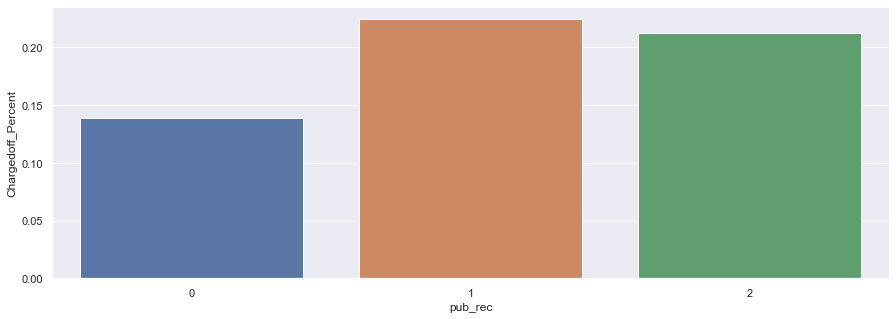

In [157]:


groupedByPubRec = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByPubRec['Total'] = groupedByPubRec['Charged Off'] + groupedByPubRec['Fully Paid'] 
groupedByPubRec['Chargedoff_Percent'] = groupedByPubRec['Charged Off'] / groupedByPubRec['Total']
groupedByPubRec = groupedByPubRec[groupedByPubRec.Chargedoff_Percent != 0]

sns.barplot(x='pub_rec', y='Chargedoff_Percent', data=groupedByPubRec)
plt.show()



#### Observations : Those who have been declared bankrupt their Chargedoff_Percent is high. 

#### r. ISSUE_YEAR VS LOAN_STATUS 

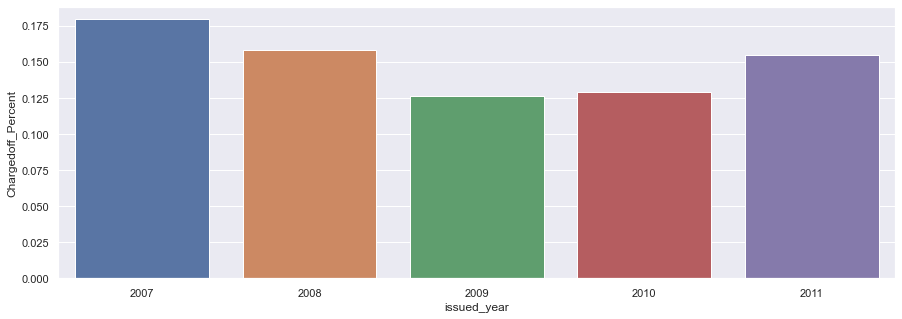

In [158]:


groupedByIssueMonth = loan.groupby(['issued_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
groupedByIssueMonth['Total'] = groupedByIssueMonth['Charged Off'] + groupedByIssueMonth['Fully Paid'] 
groupedByIssueMonth['Chargedoff_Percent'] = groupedByIssueMonth['Charged Off'] / groupedByIssueMonth['Total']
groupedByIssueMonth = groupedByIssueMonth[groupedByIssueMonth.Chargedoff_Percent != 0]

sns.barplot(x='issued_year', y='Chargedoff_Percent', data=groupedByIssueMonth)
plt.show()




#### Observations : Due to financial crisis of 2007 Chargedoff_Percent is high in that year.

## Conclusion:

### Loan Factors
1. LOAN AMOUNT :Loan of high amount are more likely to be defaulted
2. INTEREST RATE: Loan of high interest rate are more likely to defaulted 
3. TERMS: Loan issued for longer terms are more likely to be defaulted
4. PURPOSE: Loan issued for small business and renwable energy more likely to be defaulted
5. ISSUED YEAR:Loans issued during financial crisis more likely to be defaulted
6. GRADE: Lower grade loans are more likely to defaulte
7. SUB GRADE: For every grade, lower sub grade loan are more likely to defaulted


### Customers Factors
1. ANUAL INCOME: Customers with high income are less likely to default
2. DTI: Customers having high dept to income ratio are more likely to default
3. HOME_OWNERSHIP: Customers whose home ownership information  is not known are more likely  to default
4. VERFIED: Customers with verified income are more likely to default the loan
5. EMPLOYMENT TENURE: Customers who are employed for longer time are more likely to default.
6. STATE: Customers from NE are more likely to default
7. REV BAL: Customers with high revolving balance are more likely to default.
8. TOTAL_ACCOUNT: Customers with multiple open credit line are more likely to default
9. INQ_LAST_6MTHS: Customers who have enquired the most are more likely to default.
10.  PUBL_REC: Customers who have declared the bankruptcy atleast once are more likely to default.

Using these as driving factors lending club can make decision if the loan should be issued or not.